## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## Reading Dataset

In [2]:
data = pd.read_csv("recession_data.csv")

In [3]:
data.columns = ['DATE','GDP','Exports','Manufacturing','CPI']

In [4]:
data.head()

,DATE,GDP,Exports,Manufacturing,CPI
0,1996-07-01,9.177607e+11,3.614551e+11,-0.590751,9.078431
1,1996-10-01,9.084626e+11,3.623685e+11,0.197451,8.570983
2,1997-01-01,9.422047e+11,3.734178e+11,2.288496,9.198929
3,1997-04-01,9.156944e+11,4.065199e+11,2.771743,10.633984
4,1997-07-01,9.014062e+11,4.040485e+11,1.762883,7.727646


In [5]:
data.describe()

,GDP,Exports,Manufacturing,CPI
count,1.070000e+02,1.070000e+02,107.000000,107.000000
mean,4.833534e+12,4.798171e+12,1.470852,6.617144
std,2.852374e+12,4.098774e+12,5.937442,3.106612
min,9.014062e+11,3.614551e+11,-32.202000,0.463329
25%,1.687795e+12,9.183449e+11,0.196963,4.502808
50%,5.176507e+12,3.500379e+12,1.372166,5.949126
75%,7.017876e+12,7.413087e+12,2.785993,8.894641
max,1.074495e+13,1.595317e+13,44.828022,17.874950


DATE will be our index

In [6]:
data.set_index(['DATE'],inplace = True)

In [7]:
data.head()

,GDP,Exports,Manufacturing,CPI
DATE,,,,
1996-07-01,9.177607e+11,3.614551e+11,-0.590751,9.078431
1996-10-01,9.084626e+11,3.623685e+11,0.197451,8.570983
1997-01-01,9.422047e+11,3.734178e+11,2.288496,9.198929
1997-04-01,9.156944e+11,4.065199e+11,2.771743,10.633984
1997-07-01,9.014062e+11,4.040485e+11,1.762883,7.727646


## Basic Visual Analysis

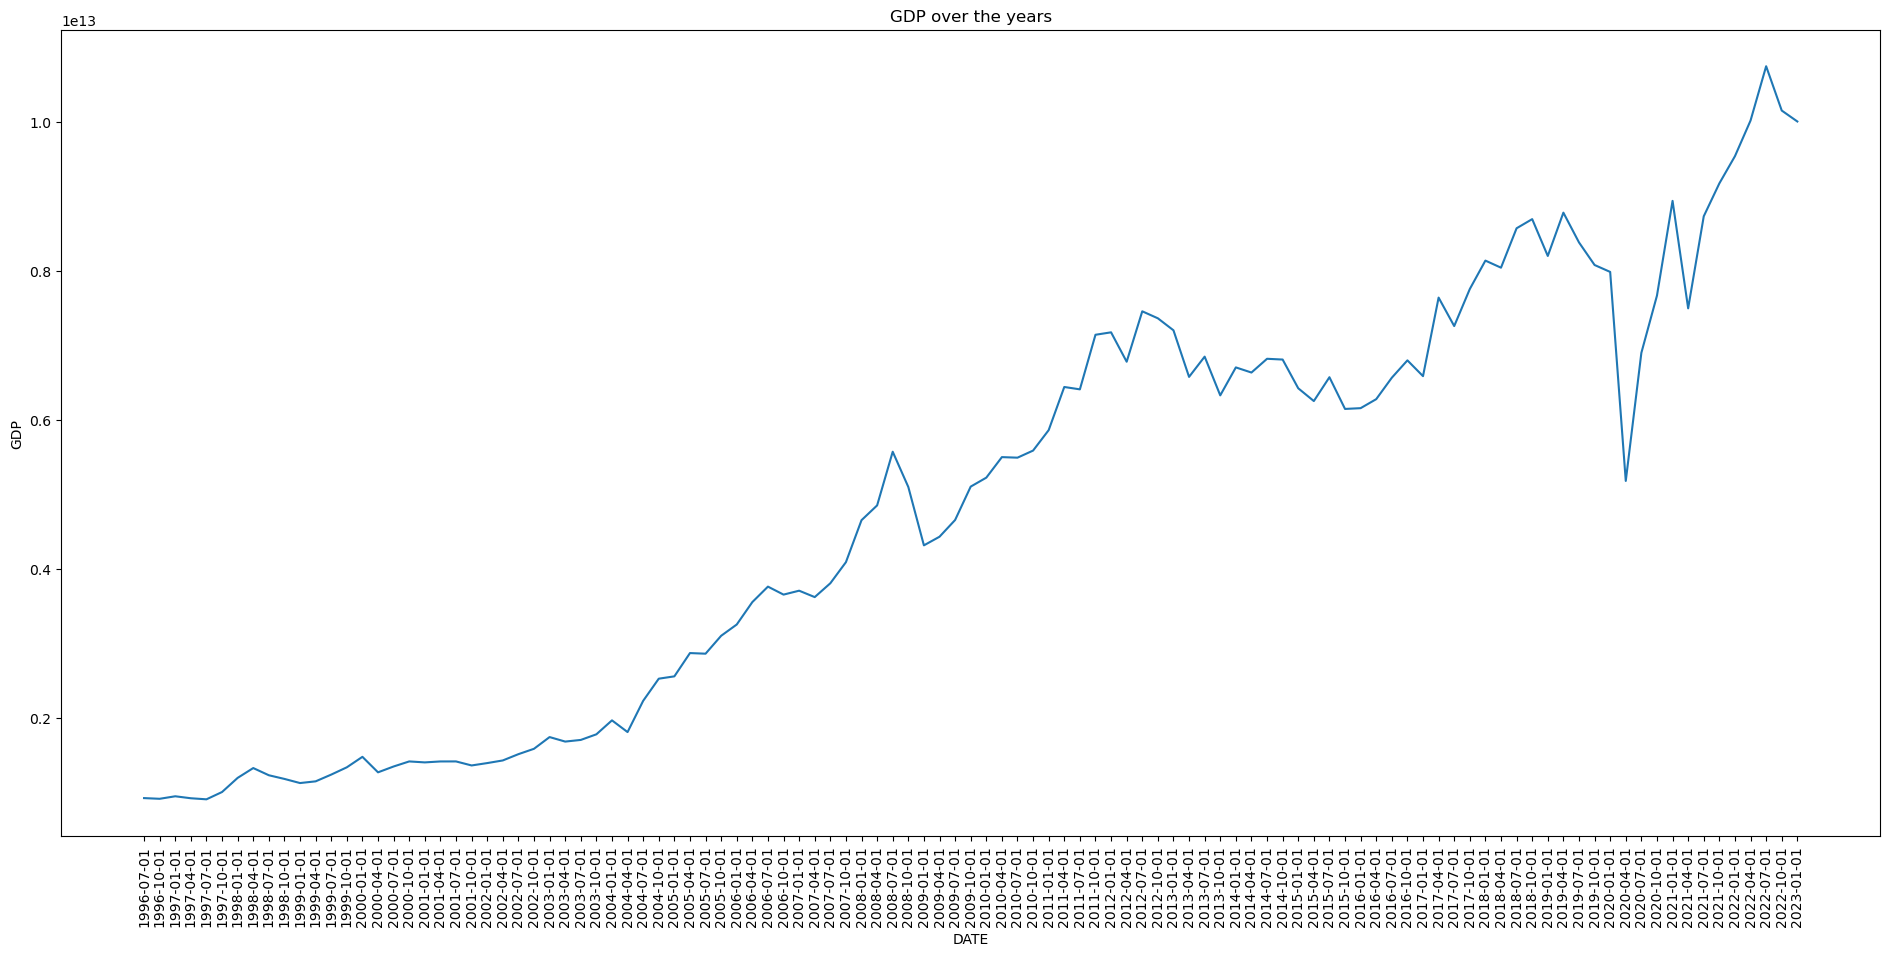

In [8]:
plt.figure(figsize = (19,9))
sns.lineplot(data = data,
            x = data.index,
            y = data['GDP'])
plt.title('GDP over the years')
plt.tight_layout()
plt.xticks(rotation=90);

From the above plot, we can infer that though there are several peaks and dips in the GDP over the years, there is a steep decline in the GDP in the first two quarters of 2020. This represnts the mid recession which occcured in 2020 due to the pandemic.

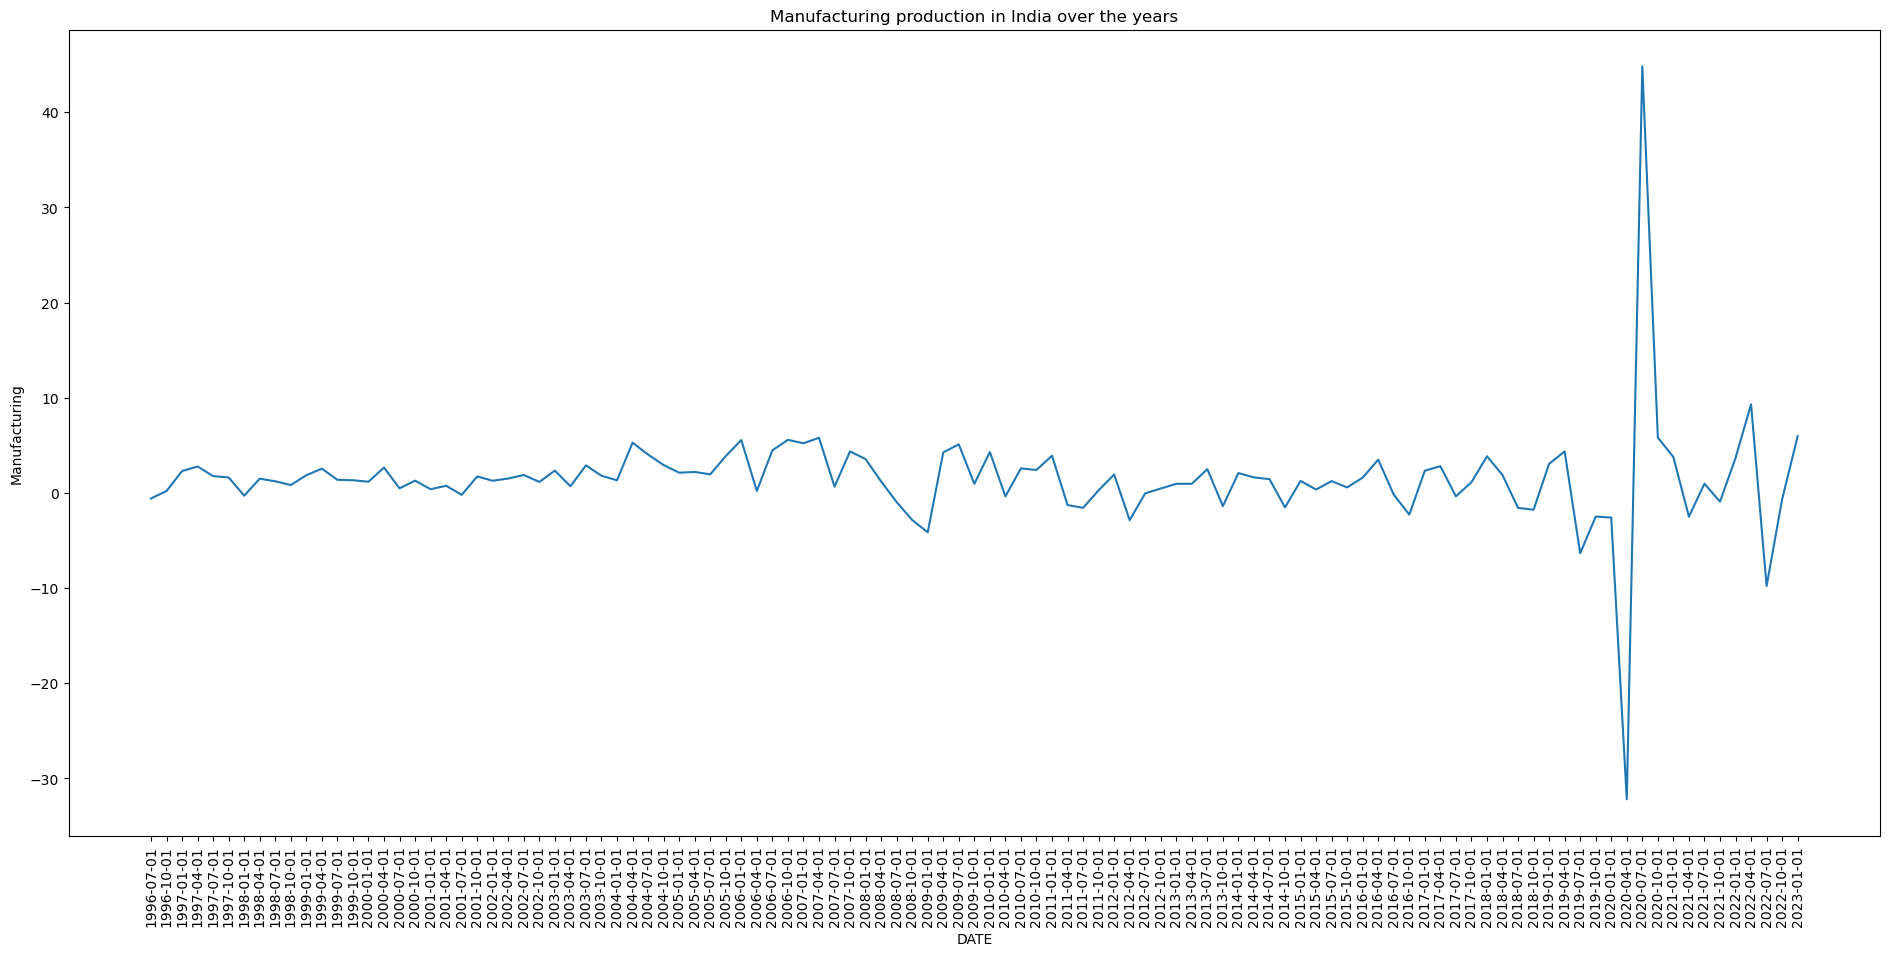

In [9]:
plt.figure(figsize = (19,9))
sns.lineplot(data = data,
            x = data.index,
            y = data['Manufacturing'])
plt.title('Manufacturing production in India over the years')
plt.tight_layout()
plt.xticks(rotation=90);

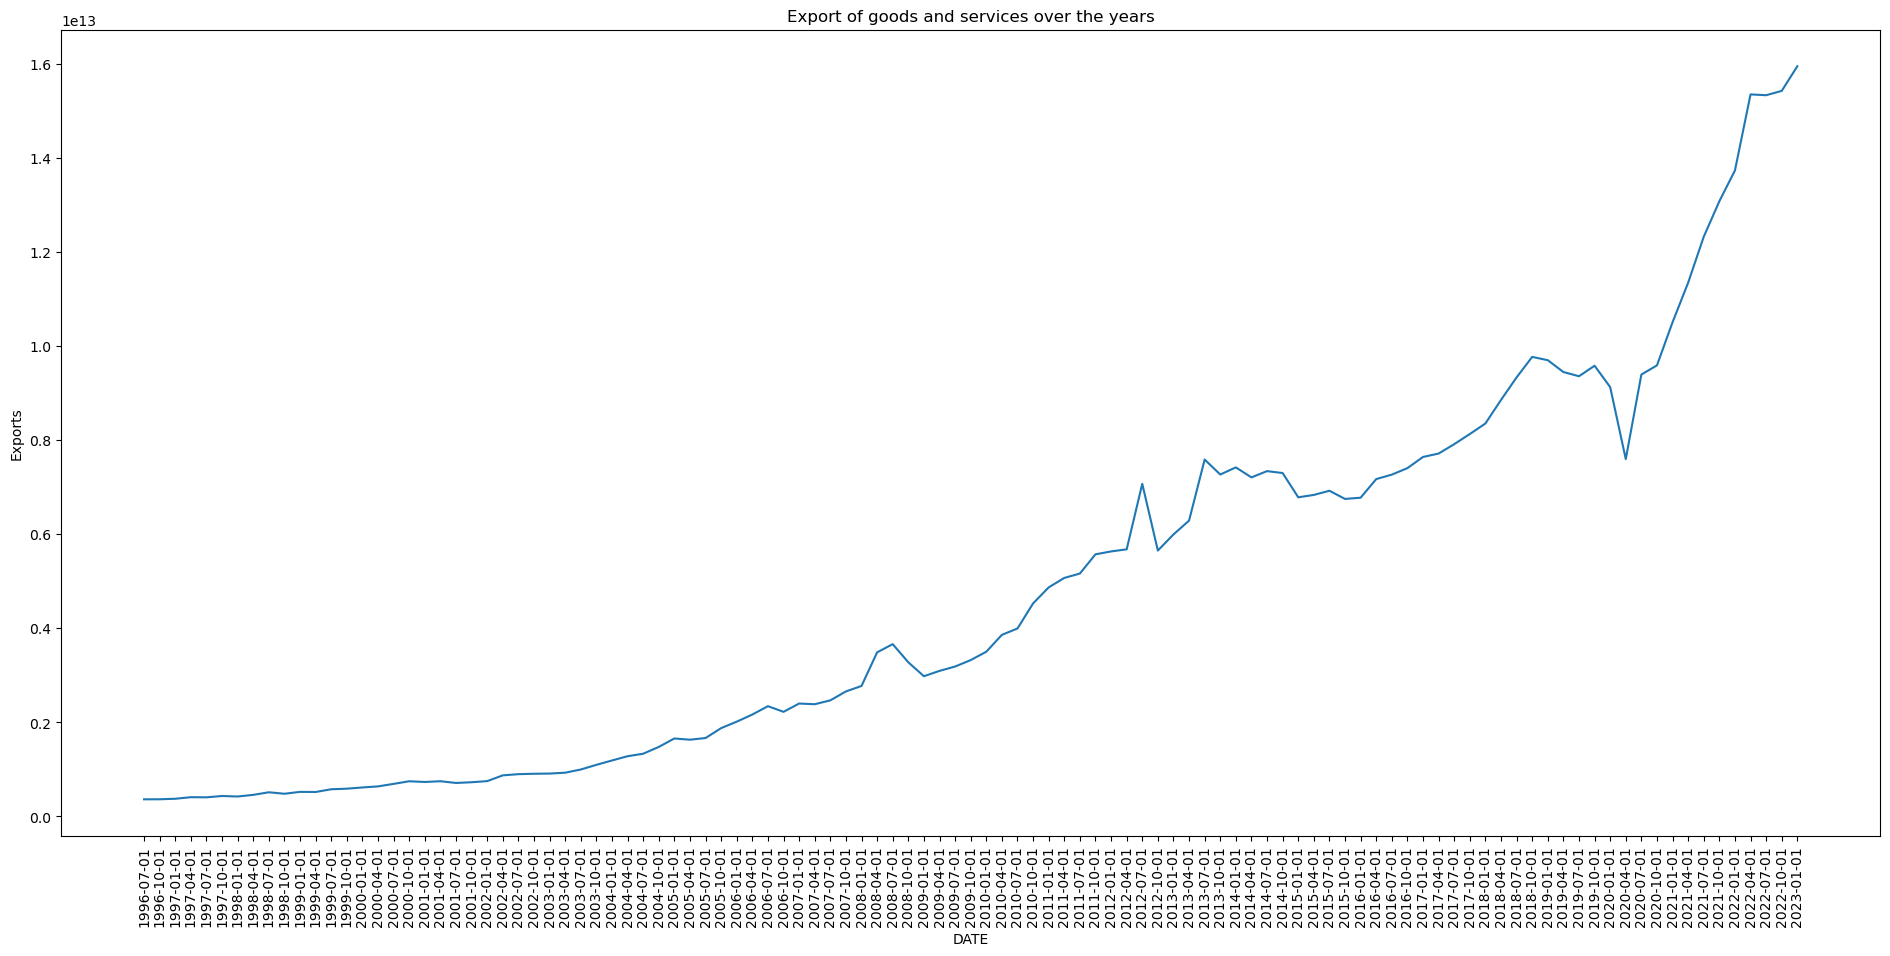

In [10]:
plt.figure(figsize = (19,9))
sns.lineplot(data = data,
            x = data.index,
            y = data['Exports'])
plt.title('Export of goods and services over the years')
plt.tight_layout()
plt.xticks(rotation=90);

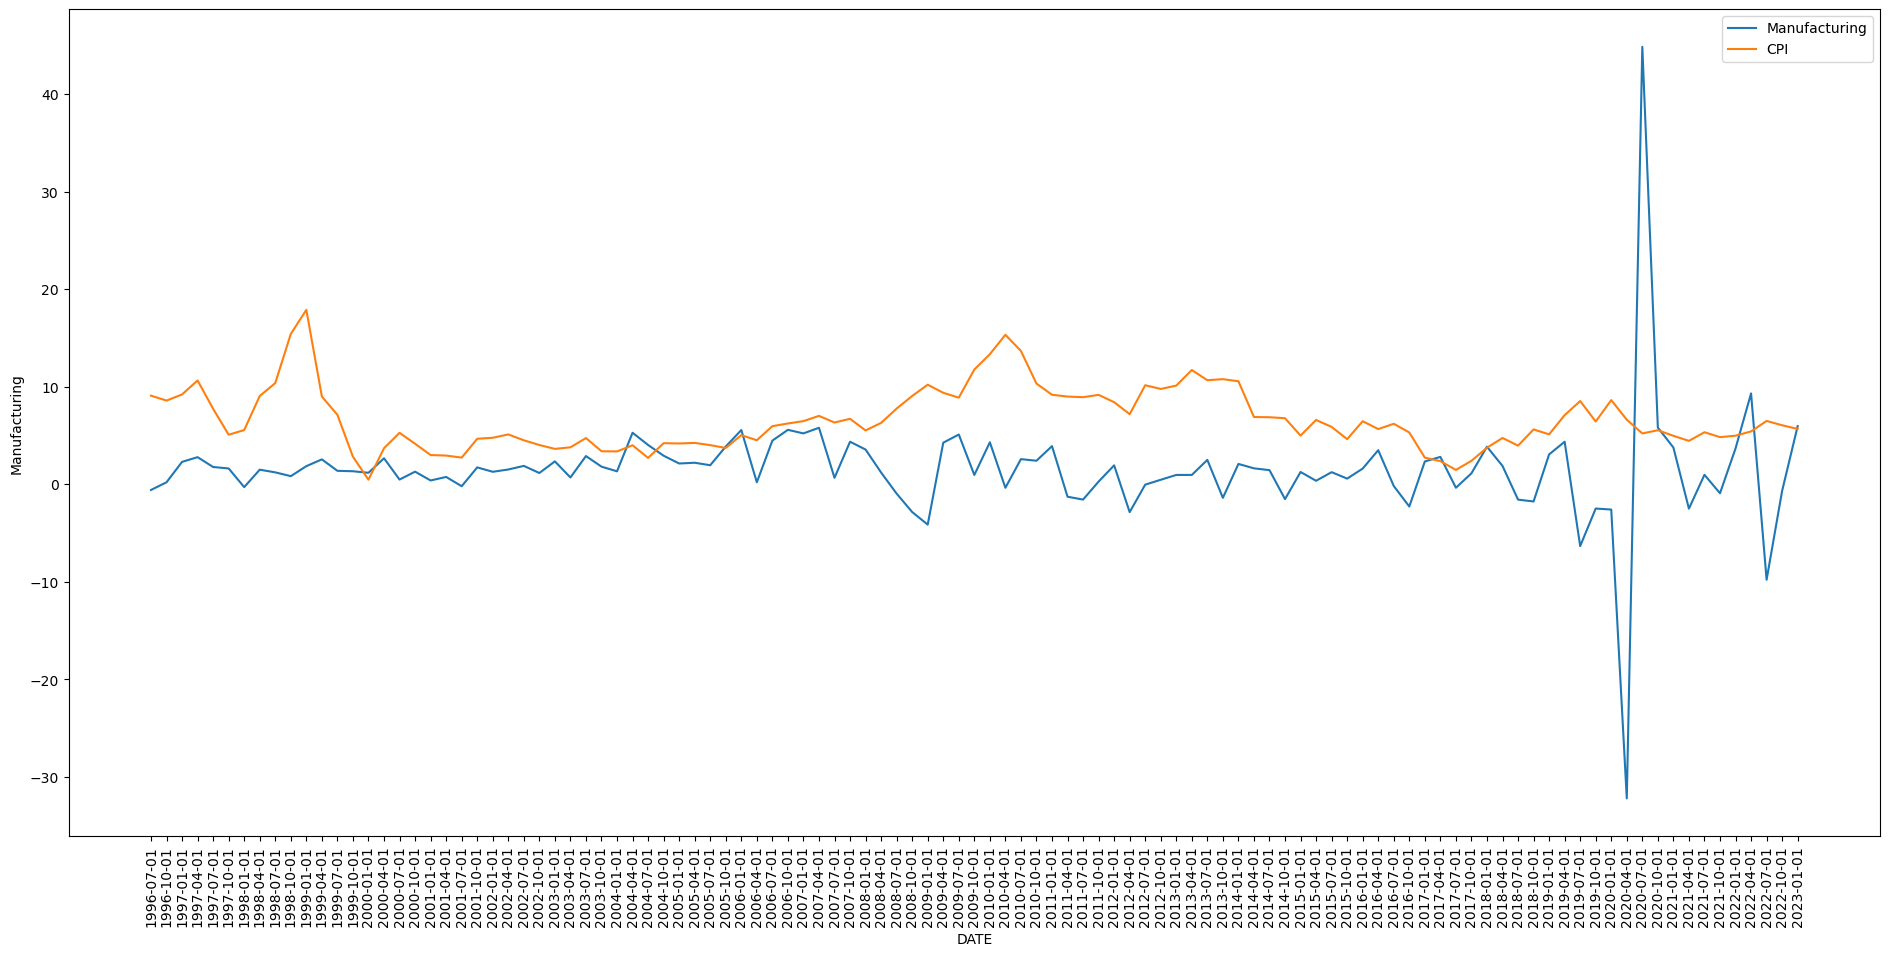

In [11]:
cols = ['Manufacturing', 'CPI']

plt.figure(figsize = (19,9))
for col in cols:
    sns.lineplot(data = data,
                 x = data.index,
                 y = data[col],
                label= col)
    plt.legend()
plt.tight_layout()
plt.xticks(rotation=90);

### Flow :
1. Separate data for the indicator 
2. Check if the time series data is stationary
3. Plot PACF, ACF plots to find out the p and q values
4. Build an ARIMA model using the p,d,q values
5. Fit the model
6. Forecast the data
7. Plot the forecast with the original data

## GDP

In [12]:
GDP = data[['GDP']]
GDP.head()

,GDP
DATE,
1996-07-01,9.177607e+11
1996-10-01,9.084626e+11
1997-01-01,9.422047e+11
1997-04-01,9.156944e+11
1997-07-01,9.014062e+11


To check in GDP is stationary, we can use AdFuller Test.\
If p value is less than 0.05, data is not stationary.

In [13]:
result = adfuller(GDP['GDP'])
print(f'ADF Statistic for GDP : {result[0]}')
print(f'p-value: {result[1]}')
print('Is Stationary:', result[1] <= 0.05)

ADF Statistic for GDP : -0.18967403828147855
p-value: 0.9397413040798084
Is Stationary: False


The GDP data is not stationary. To make it stationary, we can shift it by a value. \
But, ARIMA model can handle non stationary values.

We will try to plot Partial Auto Correlation Function and Auto Correlation Function.\
Partial Auto Correlation Function (PACF) gives us 
- p value for ARIMA model
- auto regressive term

Auto Correlation Function (ACF) gives us 
- q value for ARIMA model
- moving average term

The shift/differencing gives us the d value for ARIMA model. Since, we did not shit values, d will be 0.

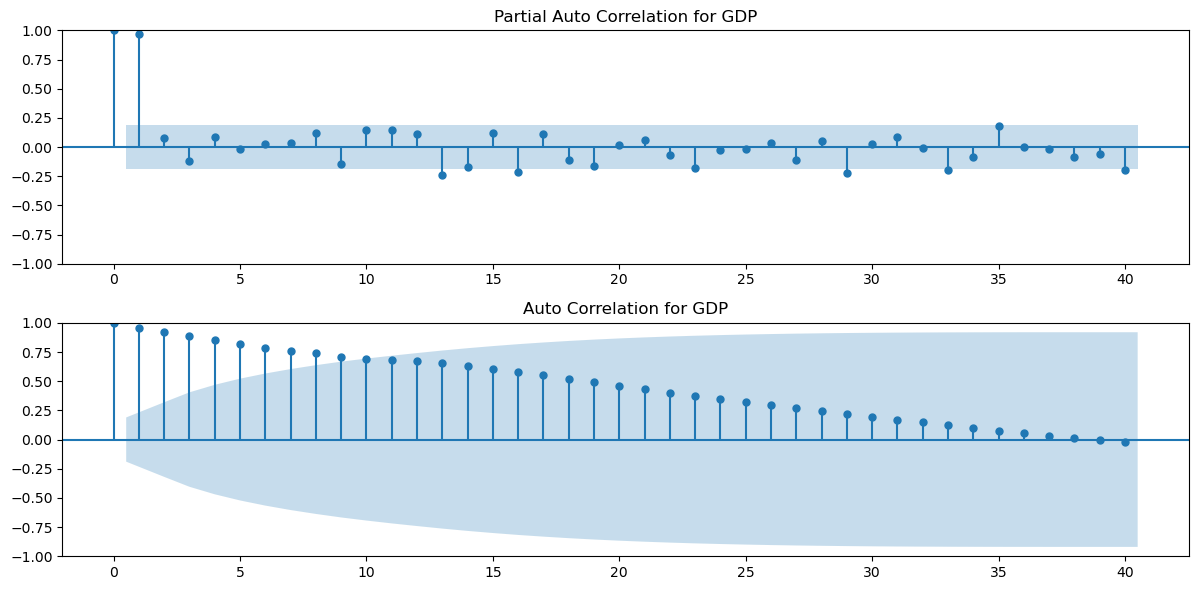

In [14]:
plt.figure(figsize=(12, 6))

# PACF plot
plt.subplot(211)
plot_pacf(GDP['GDP'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Auto Correlation for GDP')

# ACF plot
plt.subplot(212)
plot_acf(GDP['GDP'].dropna(), lags=40, ax=plt.gca())
plt.title('Auto Correlation for GDP')

plt.tight_layout()
plt.show()

The value of p from PACF : 2\
The value of q from ACF : 9

#### ARIMA model

/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  107
Model:                 ARIMA(2, 0, 9)   Log Likelihood               -3034.566
Date:                Thu, 14 Sep 2023   AIC                           6095.133
Time:                        19:36:43   BIC                           6129.879
Sample:                    07-01-1996   HQIC                          6109.219
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.834e+12   4.51e-13   1.07e+25      0.000    4.83e+12    4.83e+12
ar.L1          0.6151      1.382      0.445      0.656      -2.093       3.324
ar.L2          0.3729      1.351      0.276      0.7

/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


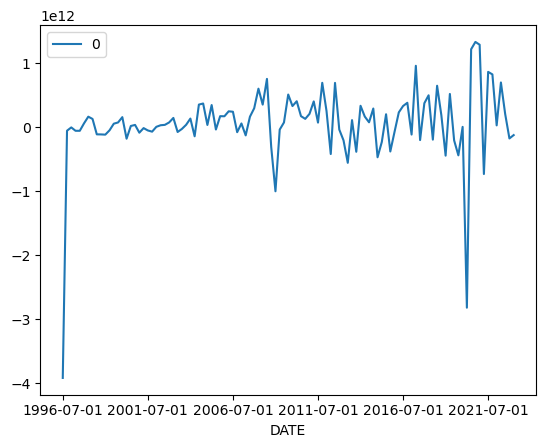

In [15]:
gdp_model = ARIMA(GDP['GDP'], order=(2, 0, 9))
gdp_model_fit = gdp_model.fit()

print(gdp_model_fit.summary())

gdp_residuals = pd.DataFrame(gdp_model_fit.resid)
gdp_residuals.plot();

In [16]:
forecast_steps = 17
gdp_forecast = gdp_model_fit.forecast(steps=forecast_steps)

print(gdp_forecast)

2023-04-01    9.929377e+12
2023-07-01    1.006257e+13
2023-10-01    9.856092e+12
2024-01-01    9.740008e+12
2024-04-01    9.707003e+12
2024-07-01    9.542455e+12
2024-10-01    9.514405e+12
2025-01-01    9.495849e+12
2025-04-01    9.466280e+12
2025-07-01    9.421623e+12
2025-10-01    9.383128e+12
2026-01-01    9.342798e+12
2026-04-01    9.303637e+12
2026-07-01    9.264511e+12
2026-10-01    9.225842e+12
2027-01-01    9.187468e+12
2027-04-01    9.149445e+12
Freq: QS-OCT, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Forcasted GDP')

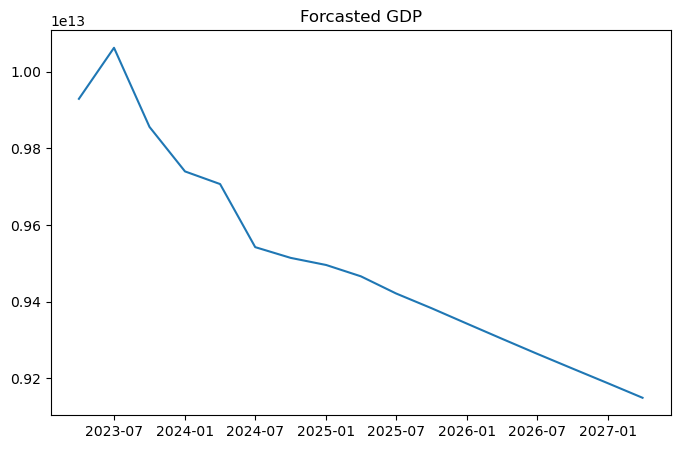

In [17]:
plt.figure(figsize = (8,5))
plt.plot(gdp_forecast)
plt.title("Forcasted GDP")

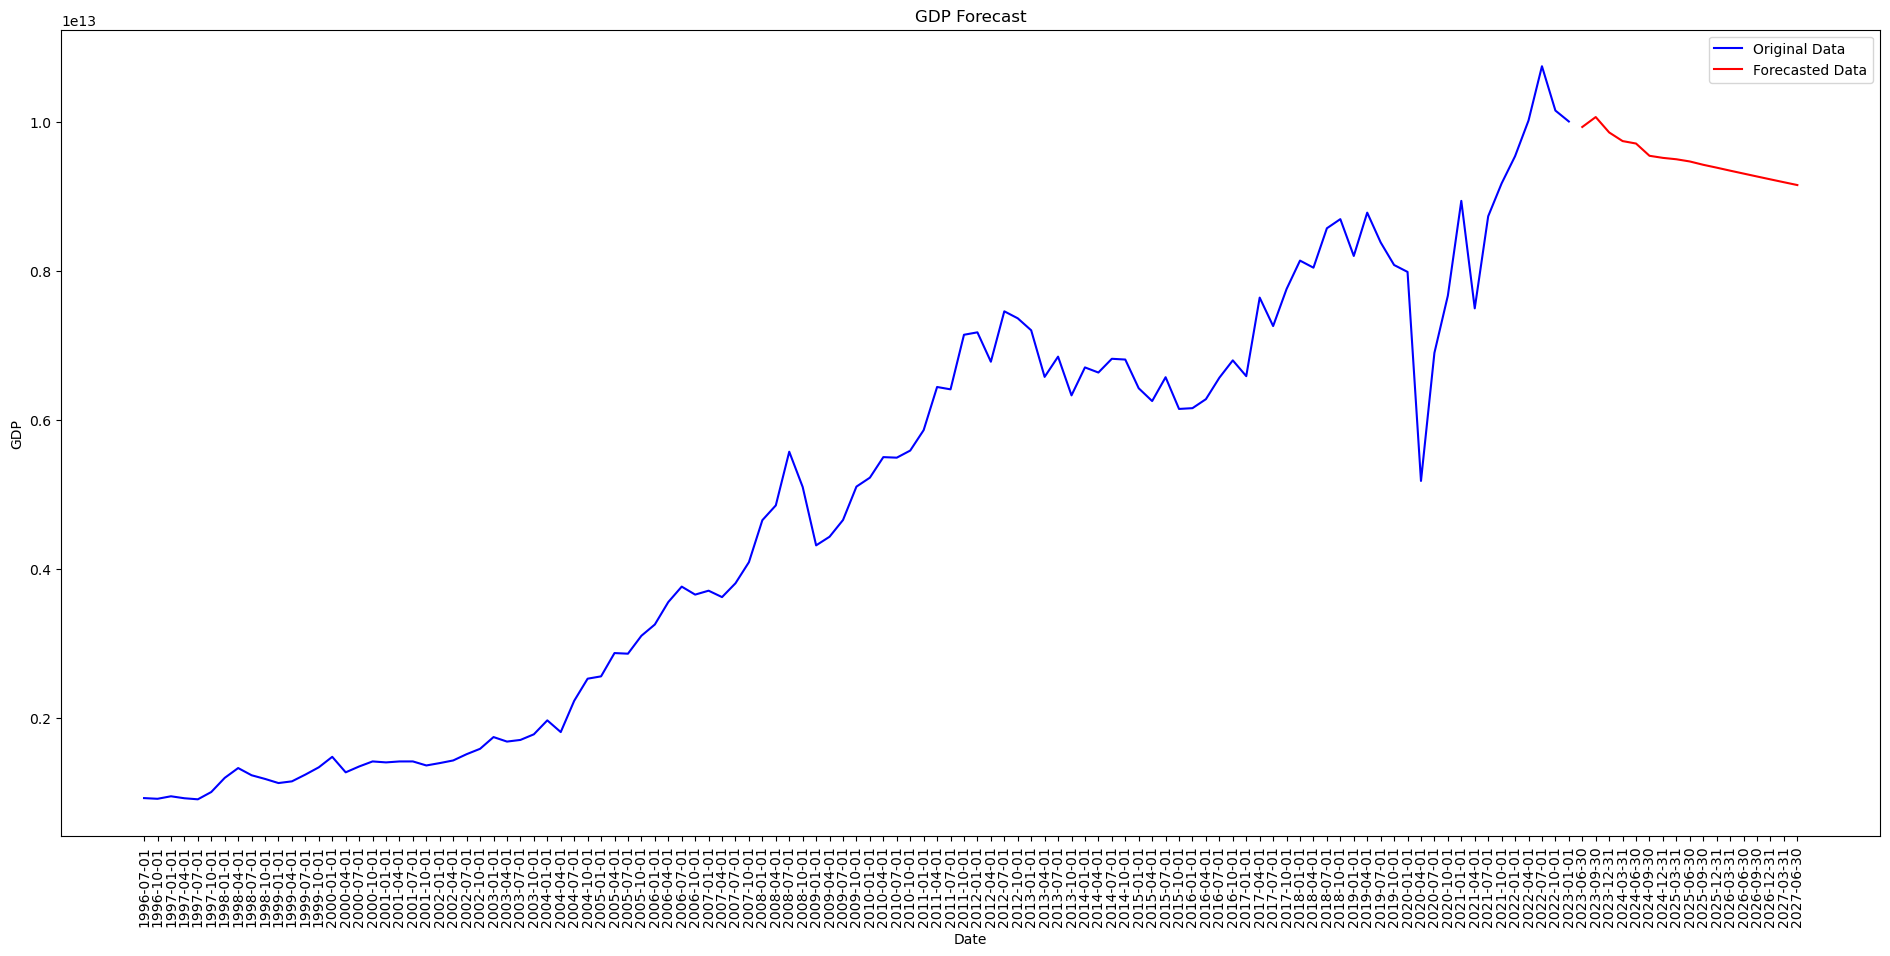

In [18]:
plt.figure(figsize = (19,9))

#original data
plt.plot(data.index, data['GDP'], label='Original Data', color='blue')

#forecast data
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='Q', tz=None)[1:]
forecast_index_str = forecast_index.strftime('%Y-%m-%d')

# plotforecasted data
plt.plot(forecast_index_str, gdp_forecast, label='Forecasted Data', color='red')

plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.title('GDP Forecast')
plt.tight_layout()
plt.xticks(rotation=90);

## Exports

In [19]:
exp = data[['Exports']]
exp.head()

,Exports
DATE,
1996-07-01,3.614551e+11
1996-10-01,3.623685e+11
1997-01-01,3.734178e+11
1997-04-01,4.065199e+11
1997-07-01,4.040485e+11


To check in GDP is stationary, we can use AdFuller Test.\
If p value is less than 0.05, data is not stationary.

In [20]:
result = adfuller(exp['Exports'])
print(f'ADF Statistic for Exports : {result[0]}')
print(f'p-value: {result[1]}')
print('Is Stationary:', result[1] <= 0.05)

ADF Statistic for Exports : 2.529092307172924
p-value: 0.9990586351786765
Is Stationary: False


The Exports data is not stationary.
But, ARIMA model can handle non stationary values.

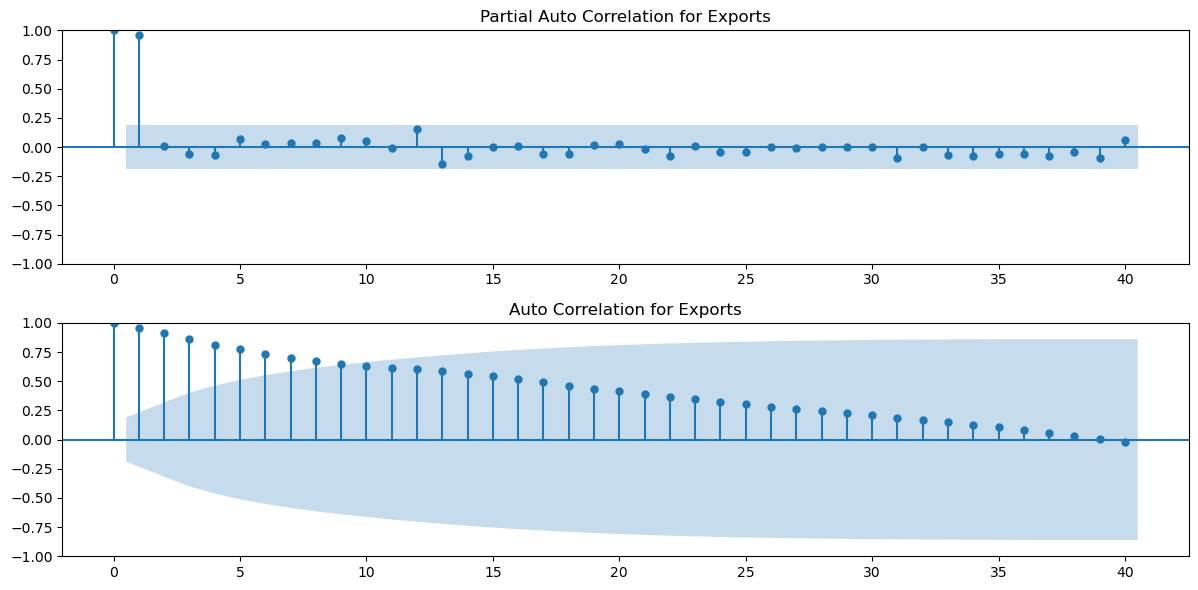

In [21]:
plt.figure(figsize=(12, 6))

# PACF plot
plt.subplot(211)
plot_pacf(exp['Exports'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Auto Correlation for Exports')

# ACF plot
plt.subplot(212)
plot_acf(exp['Exports'].dropna(), lags=40, ax=plt.gca())
plt.title('Auto Correlation for Exports')

plt.tight_layout()
plt.show()

The value of p from PACF : 1\
The value of q from ACF : 8

#### ARIMA model

/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Exports   No. Observations:                  107
Model:                 ARIMA(1, 0, 8)   Log Likelihood               -3017.860
Date:                Thu, 14 Sep 2023   AIC                           6057.720
Time:                        19:36:45   BIC                           6087.121
Sample:                    07-01-1996   HQIC                          6069.639
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.798e+12   6.51e-16   7.37e+27      0.000     4.8e+12     4.8e+12
ar.L1          0.9940      0.017     57.457      0.000       0.960       1.028
ma.L1          0.0093      0.088      0.105      0.9

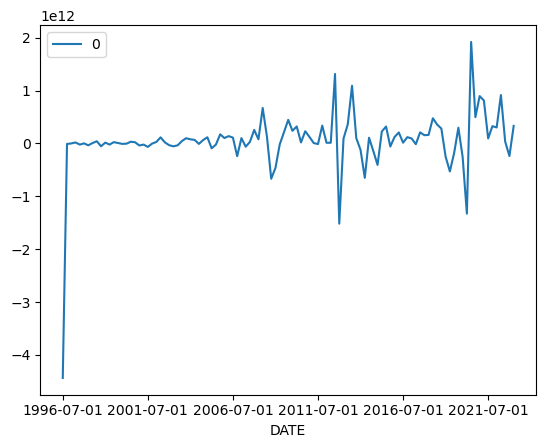

In [22]:
exp_model = ARIMA(exp['Exports'], order=(1, 0, 8))
exp_model_fit = exp_model.fit()

print(exp_model_fit.summary())

exp_residuals = pd.DataFrame(exp_model_fit.resid)
exp_residuals.plot();

In [23]:
forecast_steps = 17
exp_forecast = exp_model_fit.forecast(steps=forecast_steps)

print(exp_forecast)

2023-04-01    1.607297e+13
2023-07-01    1.609636e+13
2023-10-01    1.601472e+13
2024-01-01    1.610744e+13
2024-04-01    1.593668e+13
2024-07-01    1.584548e+13
2024-10-01    1.584382e+13
2025-01-01    1.573657e+13
2025-04-01    1.567137e+13
2025-07-01    1.560656e+13
2025-10-01    1.554214e+13
2026-01-01    1.547810e+13
2026-04-01    1.541444e+13
2026-07-01    1.535117e+13
2026-10-01    1.528827e+13
2027-01-01    1.522574e+13
2027-04-01    1.516359e+13
Freq: QS-OCT, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Forcasted Exports')

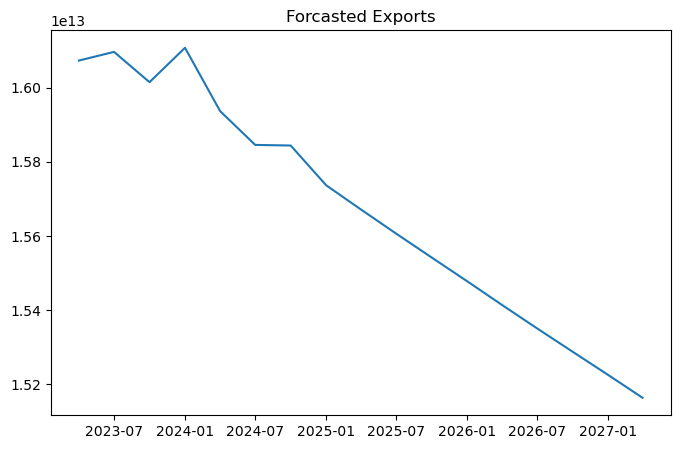

In [24]:
plt.figure(figsize = (8,5))
plt.plot(exp_forecast)
plt.title("Forcasted Exports")

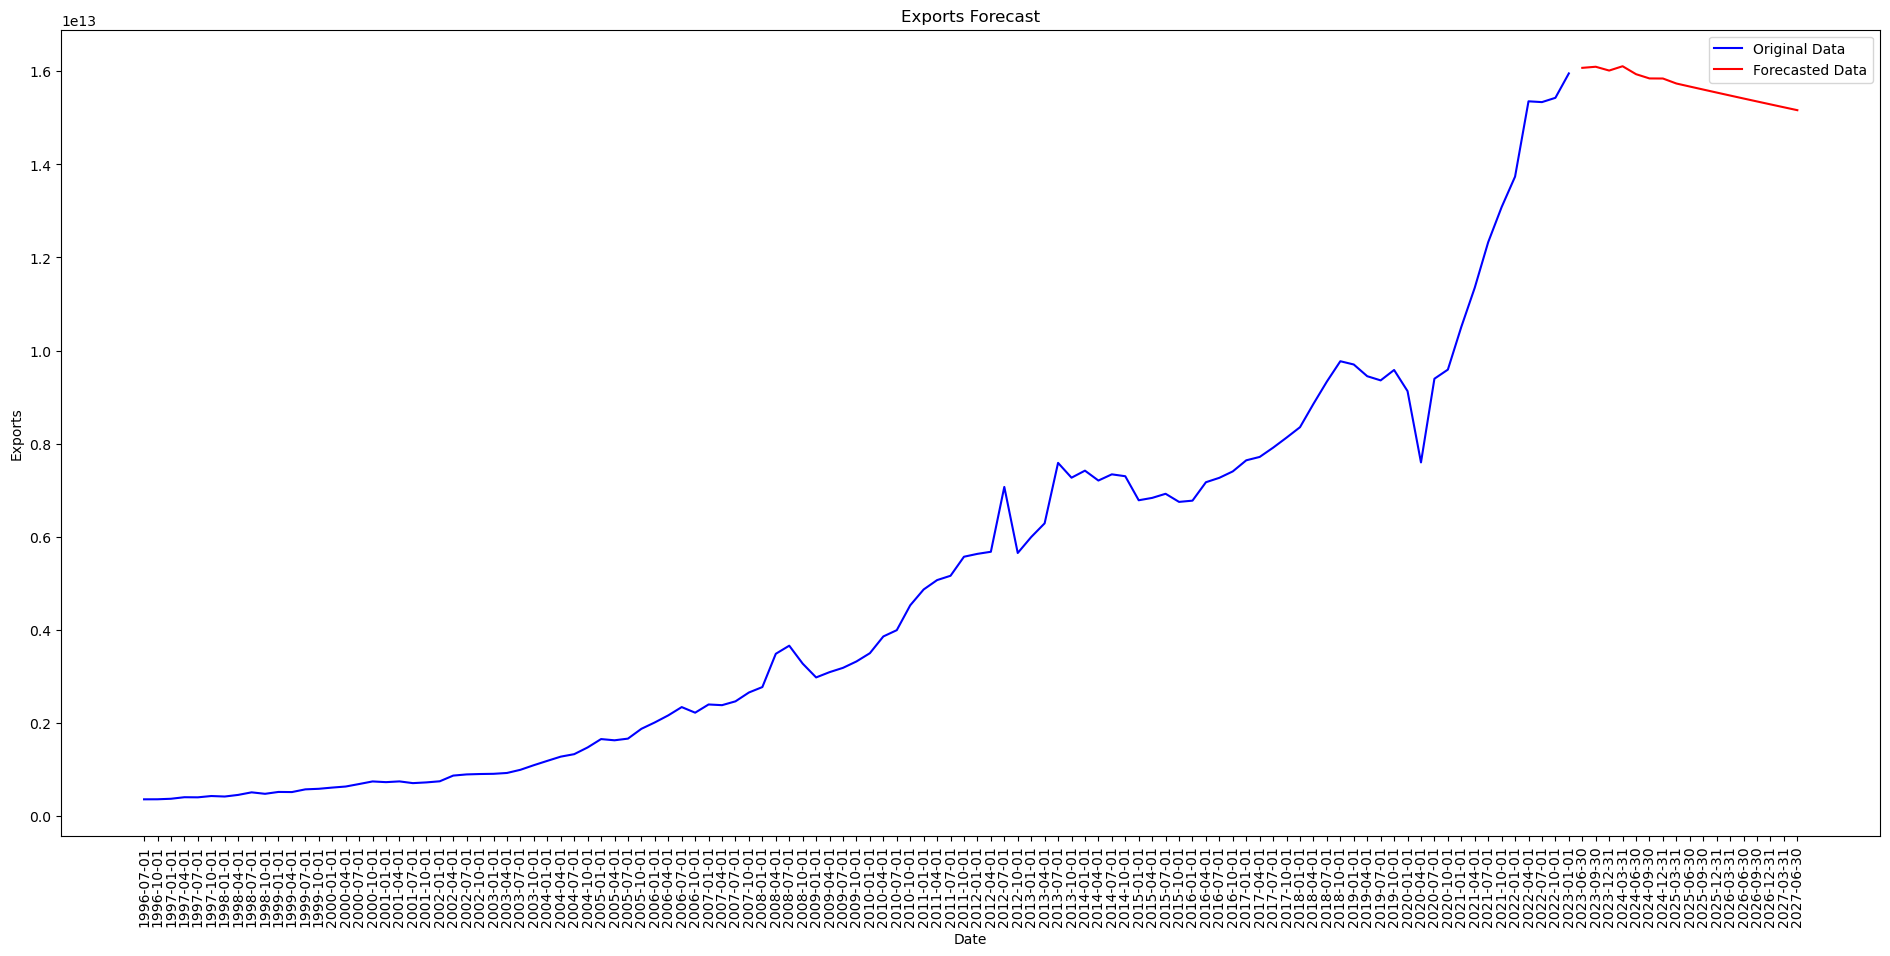

In [25]:
plt.figure(figsize = (19,9))

#original data
plt.plot(data.index, data['Exports'], label='Original Data', color='blue')

#forecast data
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='Q', tz=None)[1:]
forecast_index_str = forecast_index.strftime('%Y-%m-%d')

# plot forecasted data
plt.plot(forecast_index_str, exp_forecast, label='Forecasted Data', color='red')

plt.xlabel('Date')
plt.ylabel('Exports')
plt.legend()
plt.title('Exports Forecast')
plt.tight_layout()
plt.xticks(rotation=90);

## Manufacturing

In [26]:
man = data[['Manufacturing']]
man.head()

,Manufacturing
DATE,
1996-07-01,-0.590751
1996-10-01,0.197451
1997-01-01,2.288496
1997-04-01,2.771743
1997-07-01,1.762883


To check in GDP is stationary, we can use AdFuller Test.\
If p value is less than 0.05, data is not stationary.

In [27]:
result = adfuller(man['Manufacturing'])
print(f'ADF Statistic for Manufacturing : {result[0]}')
print(f'p-value: {result[1]}')
print('Is Stationary:', result[1] <= 0.05)

ADF Statistic for Manufacturing : -9.393123129578093
p-value: 6.480480481271486e-16
Is Stationary: True


The Manufacturing data is stationary.

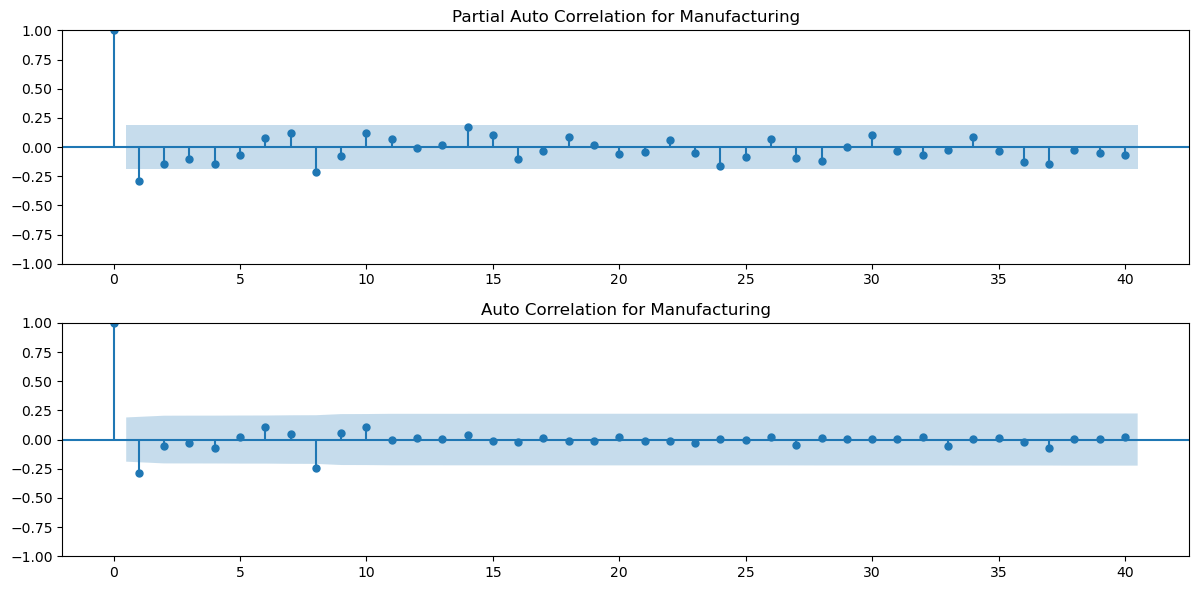

In [28]:
plt.figure(figsize=(12, 6))

# PACF plot
plt.subplot(211)
plot_pacf(man['Manufacturing'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Auto Correlation for Manufacturing')

# ACF plot
plt.subplot(212)
plot_acf(man['Manufacturing'].dropna(), lags=40, ax=plt.gca())
plt.title('Auto Correlation for Manufacturing')

plt.tight_layout()
plt.show()

The value of p from PACF : 1\
The value of q from ACF : 1

#### ARIMA model

/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Manufacturing   No. Observations:                  107
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -334.869
Date:                Thu, 14 Sep 2023   AIC                            681.738
Time:                        19:36:46   BIC                            697.775
Sample:                    07-01-1996   HQIC                           688.239
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4949      0.637      2.345      0.019       0.246       2.744
ar.L1          1.3217      0.304      4.348      0.000       0.726       1.918
ar.L2         -0.4101      0.188     -2.180      0.0

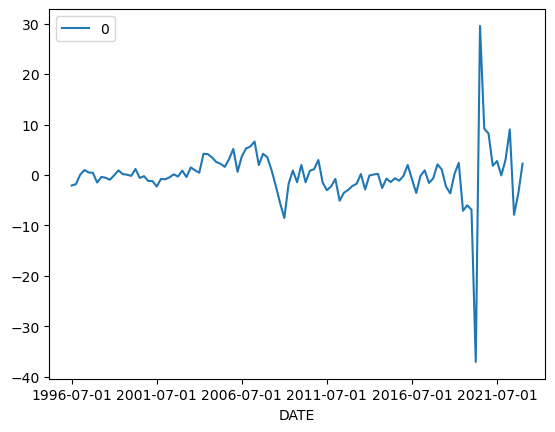

In [29]:
man_model = ARIMA(man['Manufacturing'], order=(2, 0, 2))
man_model_fit = man_model.fit()

print(man_model_fit.summary())

man_residuals = pd.DataFrame(man_model_fit.resid)
man_residuals.plot();

In [30]:
forecast_steps = 17
man_forecast = man_model_fit.forecast(steps=forecast_steps)

print(man_forecast)

2023-04-01    1.854915
2023-07-01    1.772862
2023-10-01    1.714622
2024-01-01    1.671300
2024-04-01    1.637928
2024-07-01    1.611588
2024-10-01    1.590463
2025-01-01    1.573345
2025-04-01    1.559384
2025-07-01    1.547954
2025-10-01    1.538572
2026-01-01    1.530860
2026-04-01    1.524515
2026-07-01    1.519292
2026-10-01    1.514991
2027-01-01    1.511448
2027-04-01    1.508530
Freq: QS-OCT, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Forcasted Manufacturing')

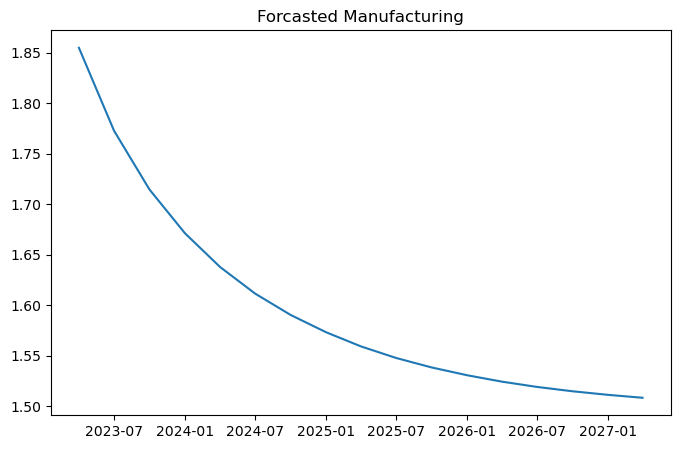

In [31]:
plt.figure(figsize = (8,5))
plt.plot(man_forecast)
plt.title("Forcasted Manufacturing")

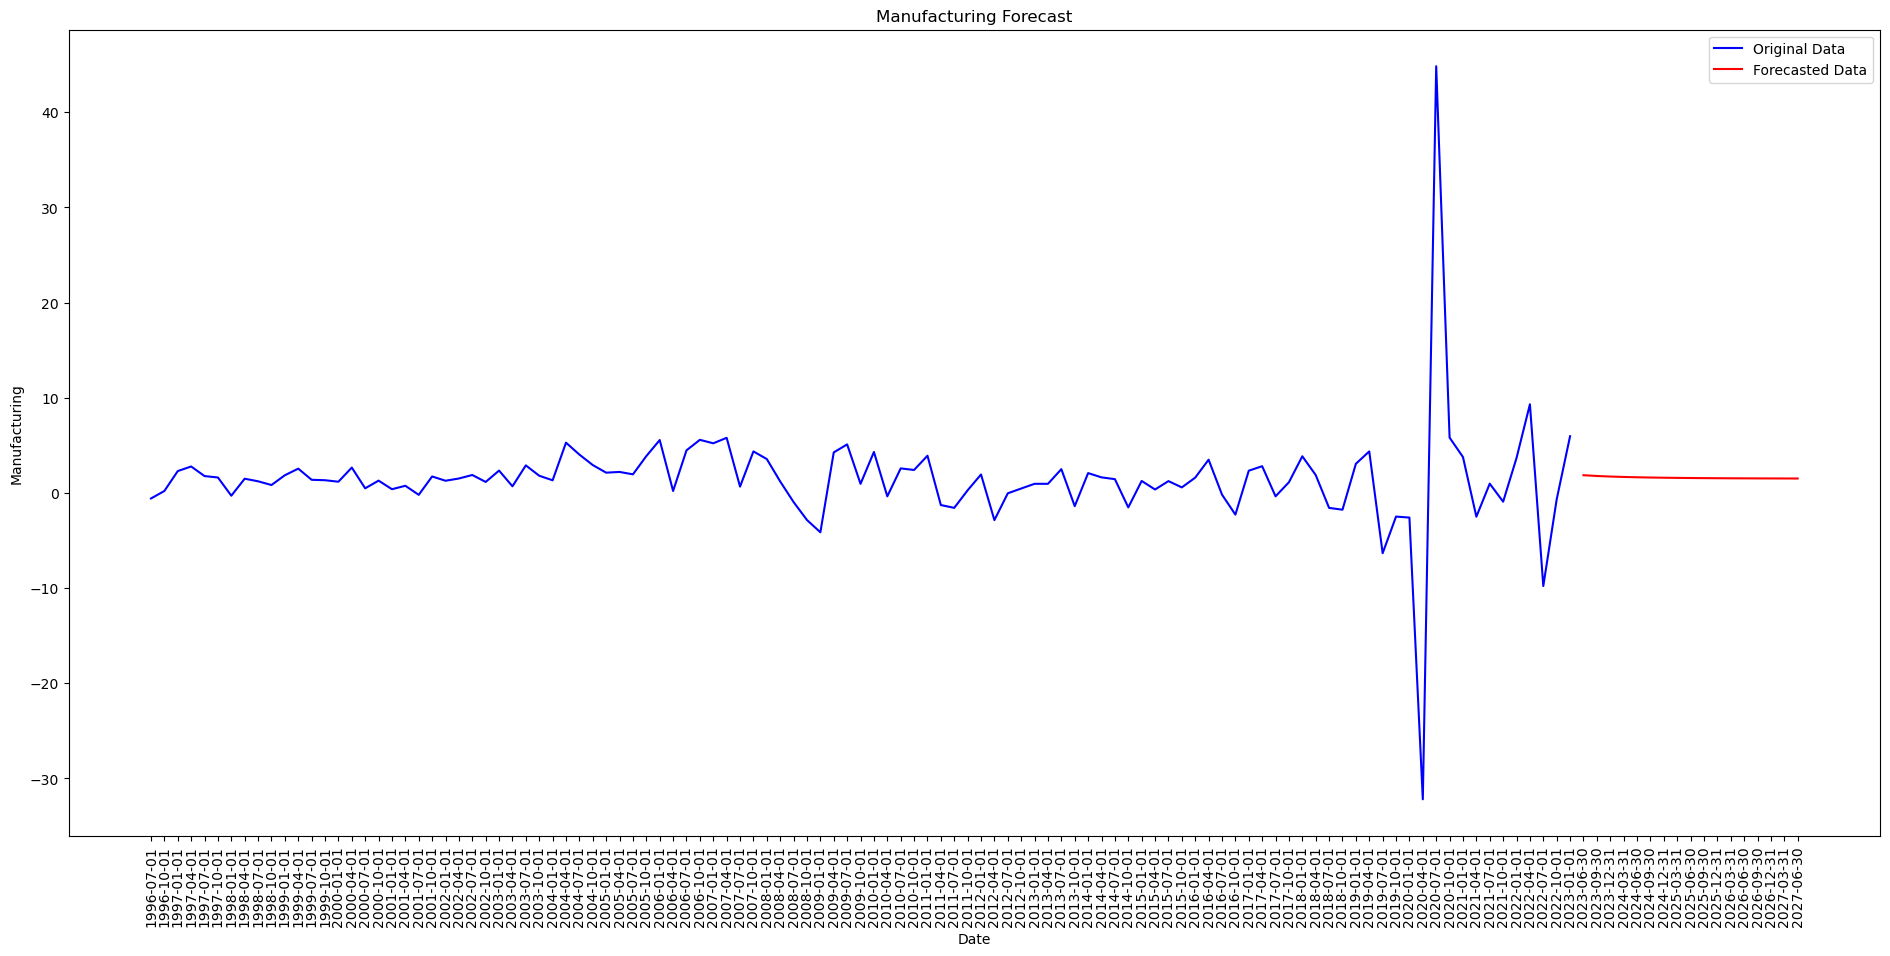

In [32]:
plt.figure(figsize = (19,9))

#original data
plt.plot(data.index, data['Manufacturing'], label='Original Data', color='blue')

#forecast data
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='Q', tz=None)[1:]
forecast_index_str = forecast_index.strftime('%Y-%m-%d')

# plotforecasted data
plt.plot(forecast_index_str, man_forecast, label='Forecasted Data', color='red')

plt.xlabel('Date')
plt.ylabel('Manufacturing')
plt.legend()
plt.title('Manufacturing Forecast')
plt.tight_layout()
plt.xticks(rotation=90);

As seen from the above forecast, the forecast for Manufacturing is not at all accuracte as the future predictions are predicted using previous predictions and hence, for longer forecasts, the values average. Hence the bad prediction.

## Consumer Price Index

In [33]:
CPI = data[['CPI']]
CPI.head()

,CPI
DATE,
1996-07-01,9.078431
1996-10-01,8.570983
1997-01-01,9.198929
1997-04-01,10.633984
1997-07-01,7.727646


To check in CPI is stationary, we can use AdFuller Test.\
If p value is less than 0.05, data is not stationary.

In [34]:
result = adfuller(CPI['CPI'])
print(f'ADF Statistic for CPI : {result[0]}')
print(f'p-value: {result[1]}')
print('Is Stationary:', result[1] <= 0.05)

ADF Statistic for CPI : -1.9328492300189355
p-value: 0.31676903788285865
Is Stationary: False


The CPI data is not stationary.But, ARIMA model can handle non stationary values.

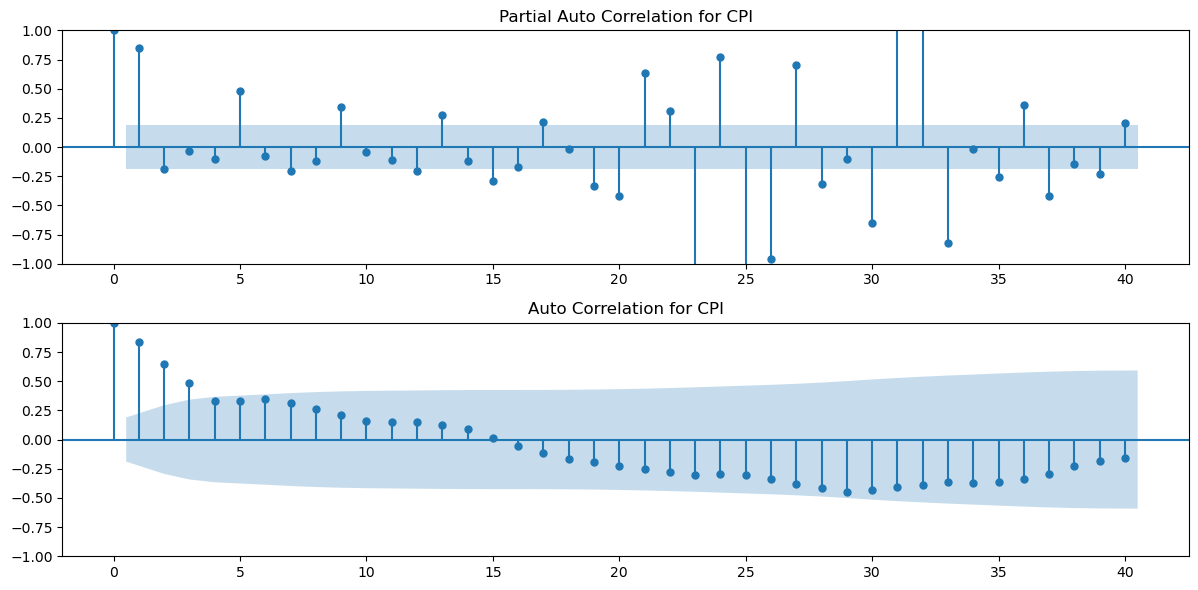

In [35]:
plt.figure(figsize=(12, 6))

# PACF plot
plt.subplot(211)
plot_pacf(CPI['CPI'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Auto Correlation for CPI')

# ACF plot
plt.subplot(212)
plot_acf(CPI['CPI'].dropna(), lags=40, ax=plt.gca())
plt.title('Auto Correlation for CPI')

plt.tight_layout()
plt.show()

The value of p from PACF : 1\
The value of q from ACF : 3

#### ARIMA model

/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/smruthi/miniconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  107
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -181.988
Date:                Thu, 14 Sep 2023   AIC                            375.977
Time:                        19:36:48   BIC                            392.014
Sample:                    07-01-1996   HQIC                           382.478
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6299      0.728      9.104      0.000       5.203       8.057
ar.L1          0.2239      0.096      2.343      0.019       0.037       0.411
ma.L1          0.9349      2.645      0.353      0.7

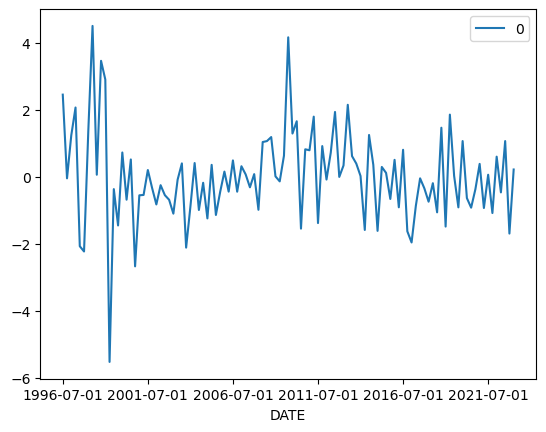

In [36]:
cpi_model = ARIMA(CPI['CPI'], order=(1, 0, 3))
cpi_model_fit = cpi_model.fit()

print(cpi_model_fit.summary())

cpi_residuals = pd.DataFrame(cpi_model_fit.resid)
cpi_residuals.plot();

In [37]:
forecast_steps = 17
cpi_forecast = cpi_model_fit.forecast(steps=forecast_steps)

print(cpi_forecast)

2023-04-01    6.091734
2023-07-01    5.058881
2023-10-01    6.488039
2024-01-01    6.598150
2024-04-01    6.622801
2024-07-01    6.628320
2024-10-01    6.629556
2025-01-01    6.629832
2025-04-01    6.629894
2025-07-01    6.629908
2025-10-01    6.629911
2026-01-01    6.629912
2026-04-01    6.629912
2026-07-01    6.629912
2026-10-01    6.629912
2027-01-01    6.629912
2027-04-01    6.629912
Freq: QS-OCT, Name: predicted_mean, dtype: float64


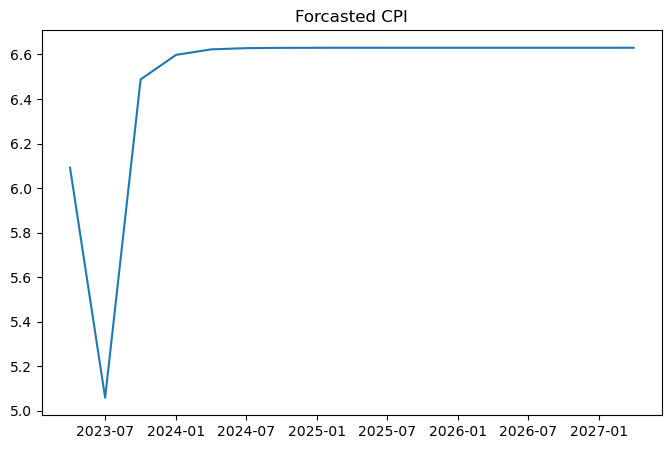

In [38]:
plt.figure(figsize = (8,5))
plt.plot(cpi_forecast)
plt.title("Forcasted CPI");

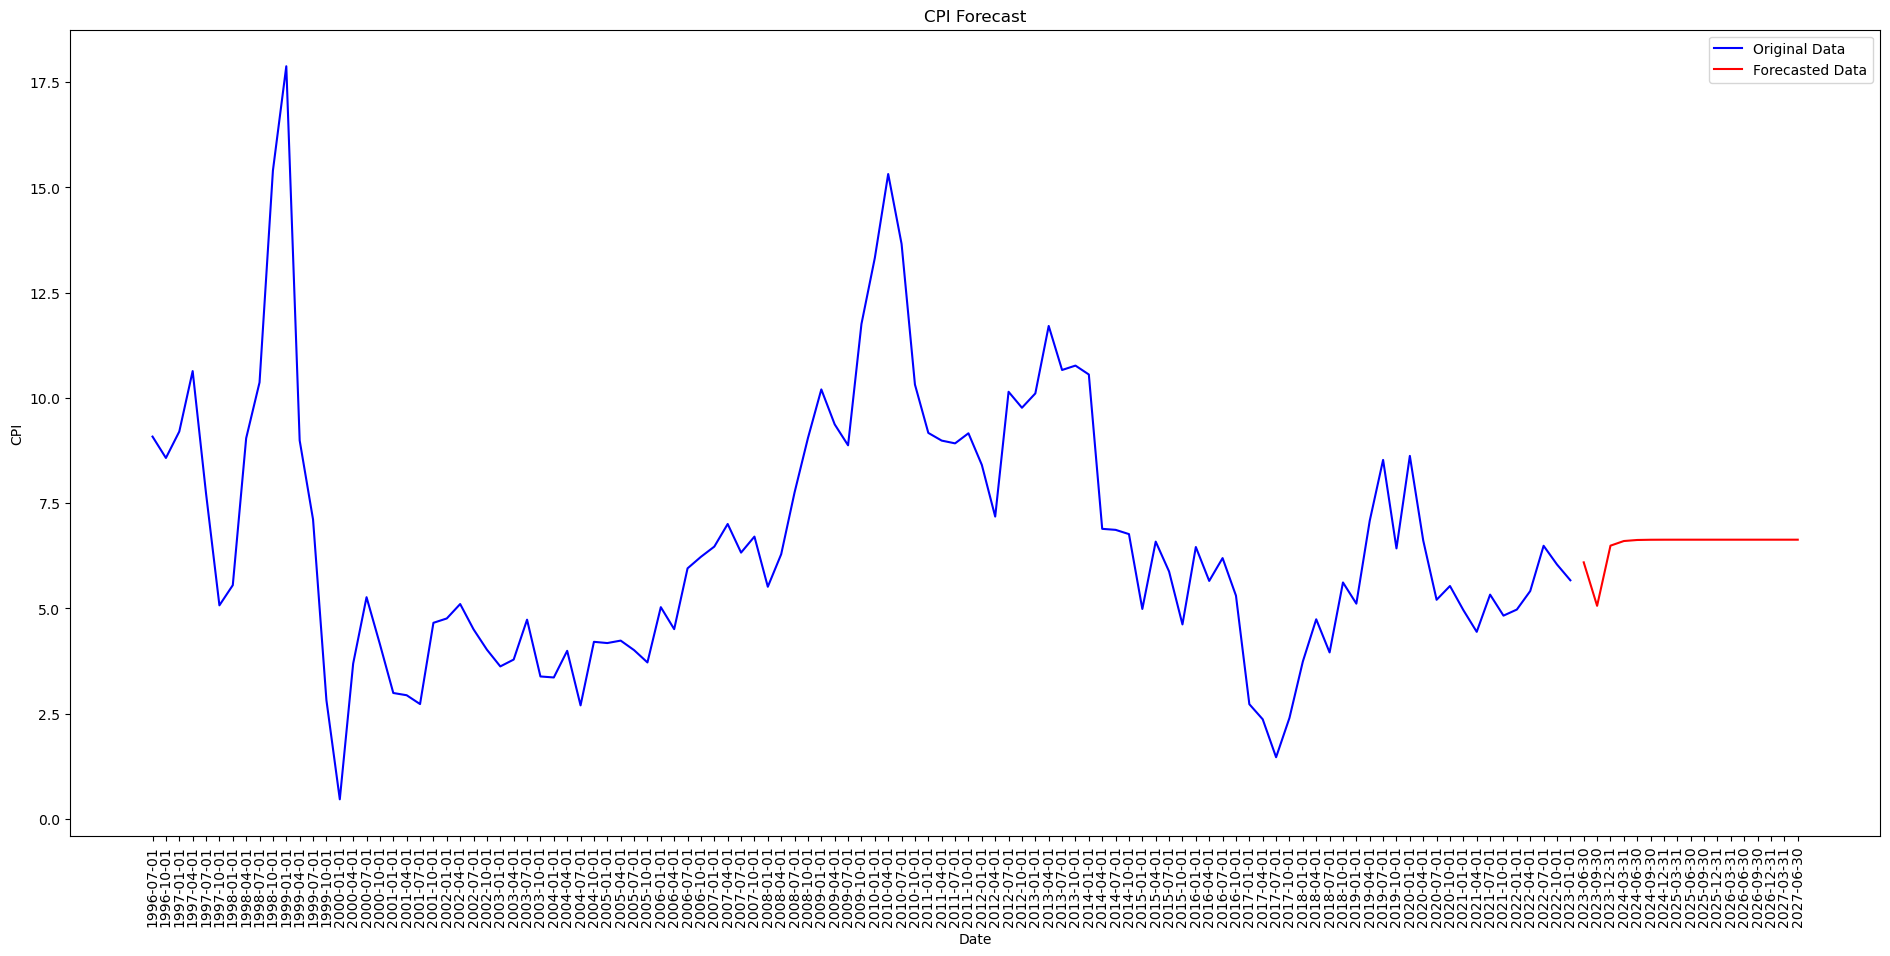

In [39]:
plt.figure(figsize = (19,9))

#original data
plt.plot(data.index, data['CPI'], label='Original Data', color='blue')

#forecast data
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='Q', tz=None)[1:]
forecast_index_str = forecast_index.strftime('%Y-%m-%d')

# plotforecasted data
plt.plot(forecast_index_str, cpi_forecast, label='Forecasted Data', color='red')

plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.title('CPI Forecast')
plt.tight_layout()
plt.xticks(rotation=90);

As seen from the above forecast, the forecast for Consumer Price Index is not at all accuracte as the future predictions are predicted using previous predictions and hence, for longer forecasts, the values average. Hence the flatline after 3 quarters.

## Recession Prediction

### GDP and Exports Plot

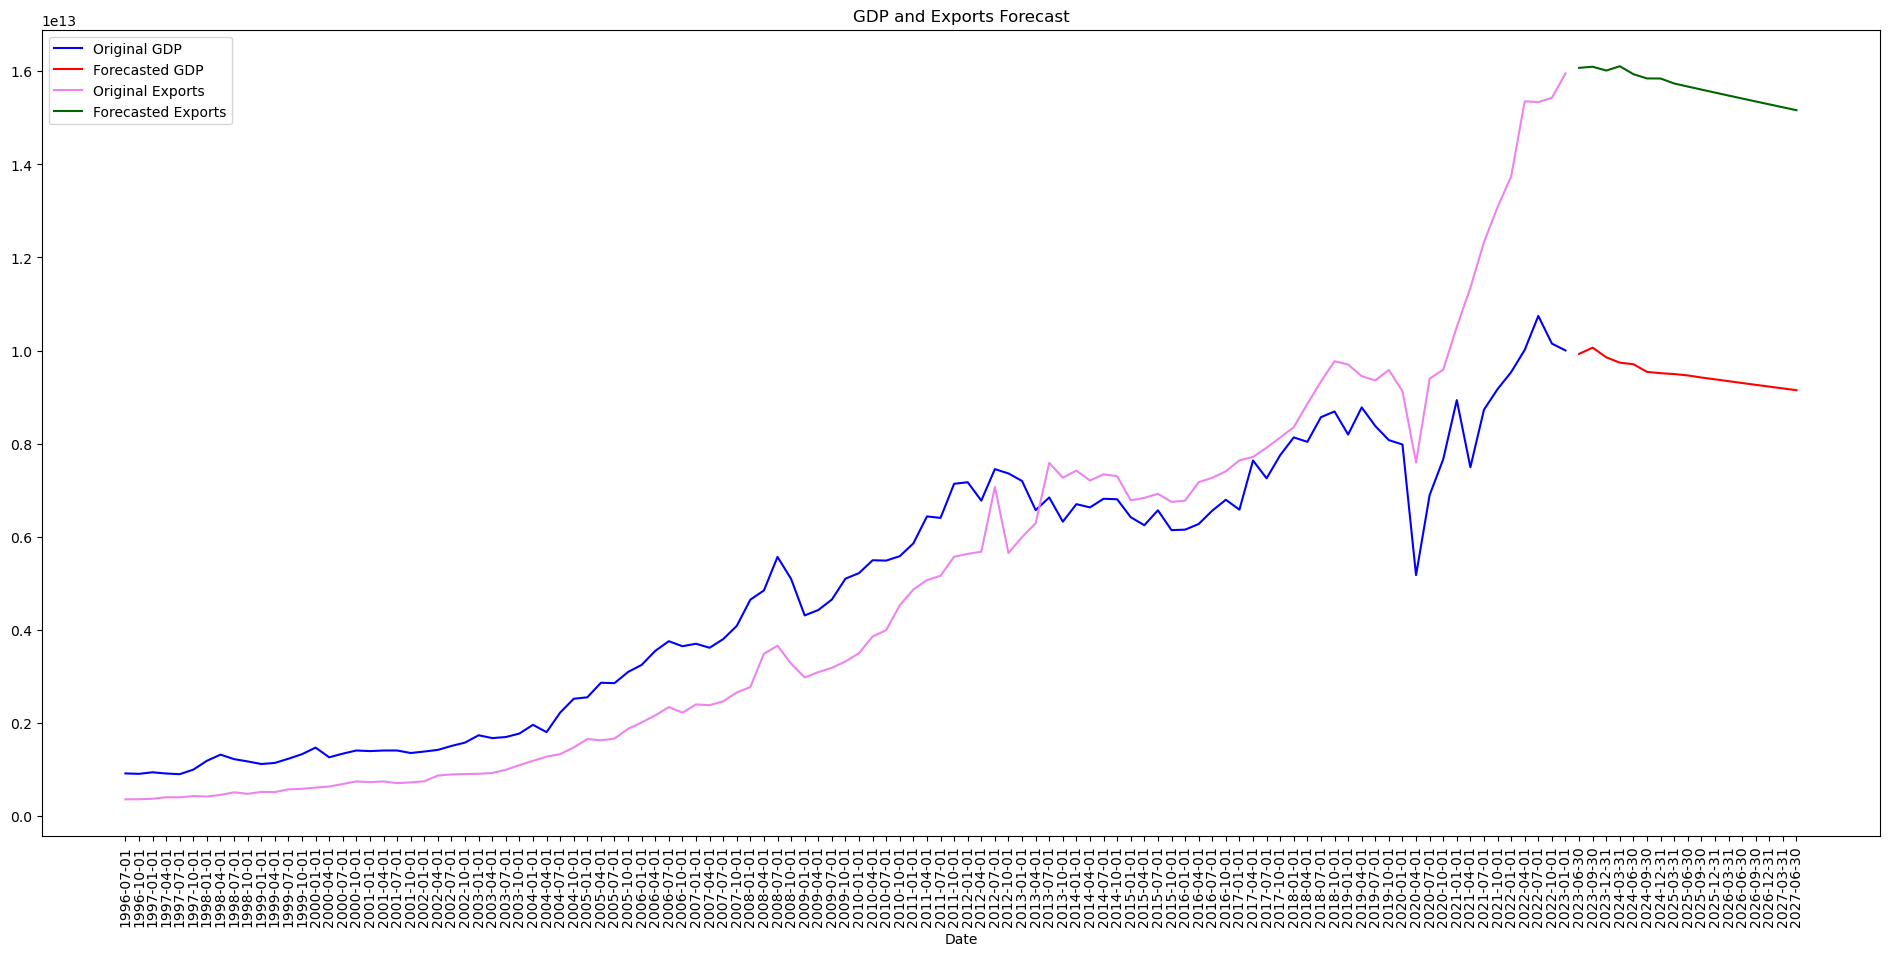

In [40]:
plt.figure(figsize=(19,9))
plt.plot(data.index, data['GDP'], label='Original GDP', color='blue')
plt.plot(forecast_index_str, gdp_forecast, label='Forecasted GDP', color='red')

plt.plot(data.index, data['Exports'], label='Original Exports', color='violet')
plt.plot(forecast_index_str, exp_forecast, label='Forecasted Exports', color='darkgreen')

plt.xlabel('Date')
plt.legend()
plt.title('GDP and Exports Forecast')
plt.tight_layout()
plt.xticks(rotation=90);

### Manufacturing and Consumer Price Index Plot

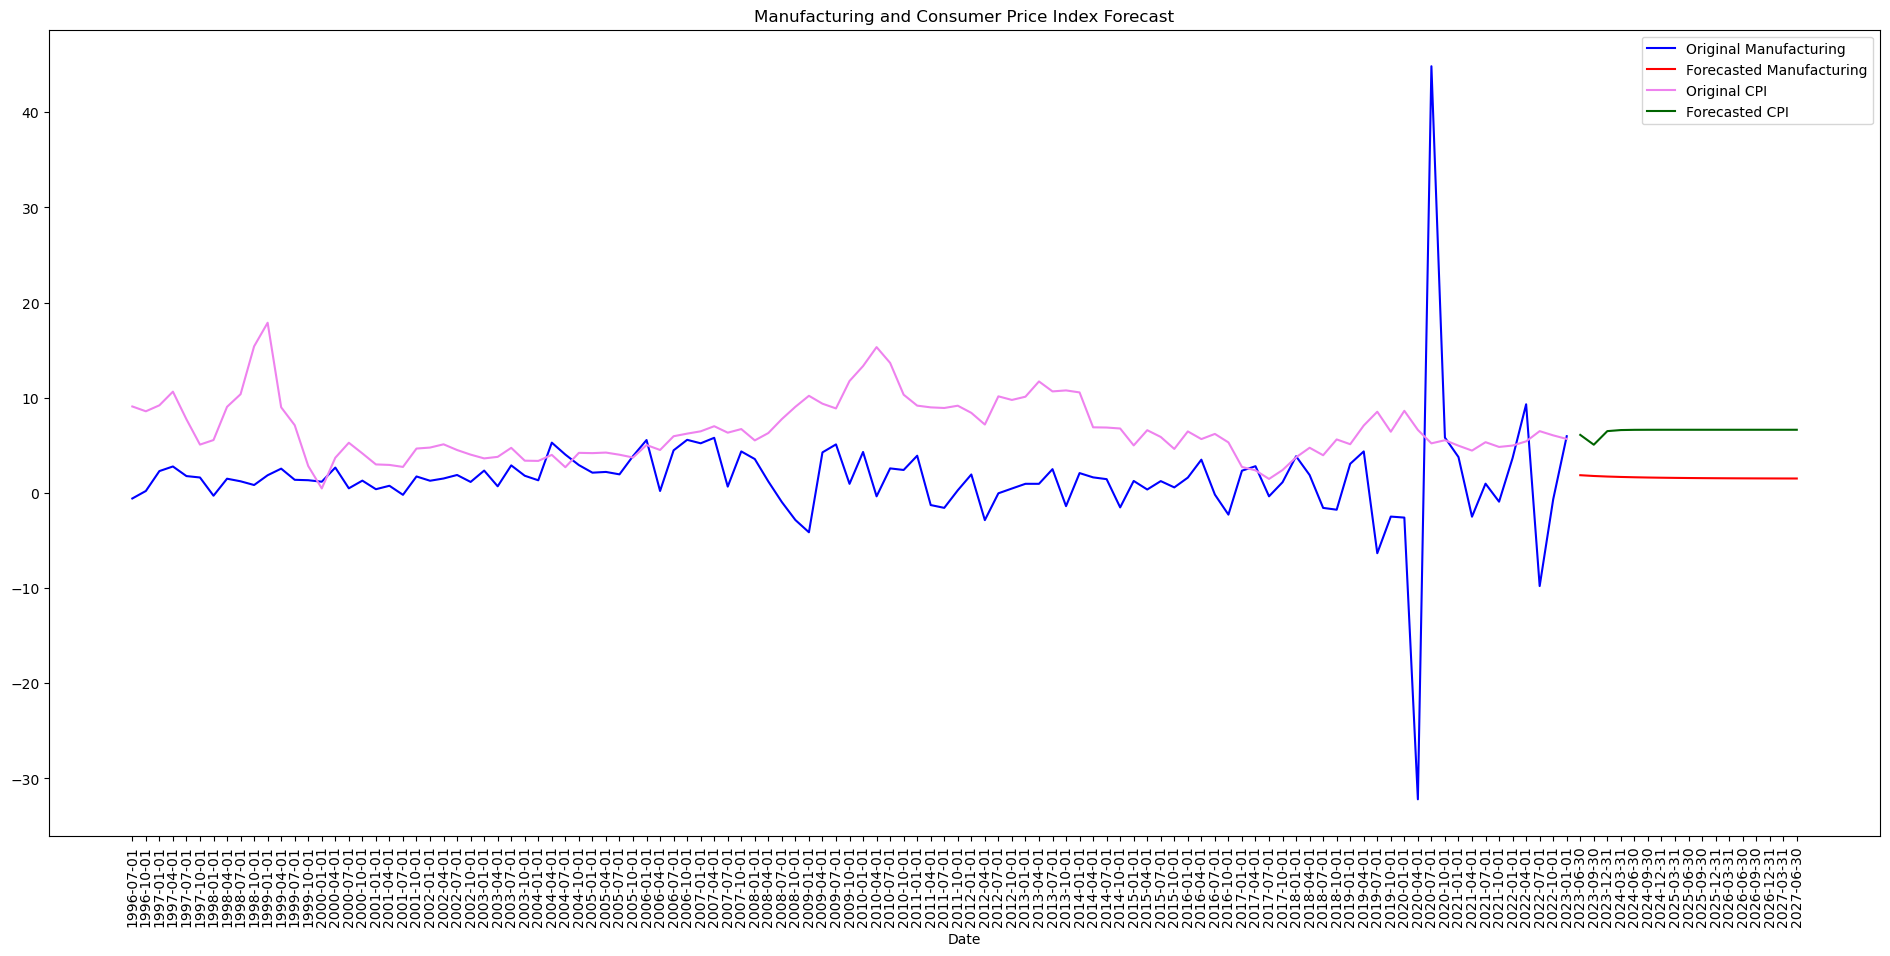

In [41]:
plt.figure(figsize=(19,9))
plt.plot(data.index, data['Manufacturing'], label='Original Manufacturing', color='blue')
plt.plot(forecast_index_str, man_forecast, label='Forecasted Manufacturing', color='red')

plt.plot(data.index, data['CPI'], label='Original CPI', color='violet')
plt.plot(forecast_index_str, cpi_forecast, label='Forecasted CPI', color='darkgreen')

plt.xlabel('Date')
plt.legend()
plt.title('Manufacturing and Consumer Price Index Forecast')
plt.tight_layout()
plt.xticks(rotation=90);

As seen from the above plot, the forecast for Manufacturing and Consumer Price Index is not at all accuracte as the future predictions are predicted using previous predictions and hence, for longer forecasts, the values average. Hence the bad prediction.\
To avoid this, we will need more data. Data is unavailable for economic indicators of regression for India. The data available is either very recent, or annual data (which will give only 60 data points for 60 years)

The forecasting can be done to an extent only if we have many data points (Monthly or daily data) and more factors like Unemployment Rate, Inflation ( for which the data was unavailable)

With the prediction, it can be clearly said that, there is **no recession** in the next 5 years in India (according to this prediction). There is no drastic reduction in the GDP or the export. The reduction is gradual. Hence, it can be conveniently said that there will be no recession in the next 4-5 years.

What we need to predict recession :
- Good Data
- Data which had economic indicators which actually help predict resecssion
- Monthly or Daily Data
- Data for many years (so we get many data points)